In [8]:
#In this model - I changed the data augmentation parameters and the weights for viola and changed the number of layers 

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

# Setting weights to the train class_weights

In [3]:
#setting class_weights based on the class 10. 
#Essentially we treating every instance of the classes as instances of class 10
# For example weight of 4 for class 0 means: 
    #treat every instance of class 0 as 4 instances of class 10
    
#changes log
#class 1 from 4. ot 5.
#class 2 from 1.5 to 2
#class 15 from 2.5 to 3

class_weight = {0:5. ,
                1:2., 
                2:2 ,
                3:2.,
                4:3.,
                5:2.,
                6:1.5,
                7:4.,
                8:2.,
                9:3.,
                10:1.,
                11:4.,
                12:3.,
                13:2.,
                14:3.,
                15:3
               }

# Loading the images into train and validation sets

Load the images

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#setting the directory for the train dataset
directory = r"../raw_data/train"

In [8]:
#augmenting the data 
#log change rescale from 255 to 155, rotation rate from 90 to 180
train_datagen = ImageDataGenerator(
        rescale=1./155,
        vertical_flip=True,
        width_shift_range=0.3,
        zoom_range=[0.5, 1.5],
        rotation_range =180,
        brightness_range=(0.1, 0.9),
        channel_shift_range=150.0,
        validation_split = 0.2)

valid_datagen = ImageDataGenerator(
        rescale=1./155,
        validation_split = 0.2)

In [10]:
img_height, img_width = (156,156)
#change log changed from 256 to 156

In [11]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = valid_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


# Training baseline model

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
num_classes = 16

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
import tensorflow.keras.losses

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 156, 156, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 39, 39, 64)        3

In [16]:
epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    class_weight=class_weight,
    epochs = epochs)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
108/108 [==============================] - 162s 1s/step - loss: 6.2816 - accuracy: 0.0780 - val_loss: 2.6426 - val_accuracy: 0.1346
Epoch 2/10
108/108 [==============================] - 175s 2s/step - loss: 6.0891 - accuracy: 0.1102 - val_loss: 2.5790 - val_accuracy: 0.1310
Epoch 3/10
108/108 [==============================] - 173s 2s/step - loss: 5.8029 - accuracy: 0.1605 - val_loss: 2.4286 - val_accuracy: 0.1995
Epoch 4/10
108/108 [==============================] - 169s 2s/step - loss: 5.6116 - accuracy: 0.1912 - val_loss: 2.3442 - val_accuracy: 0.2200
Epoch 5/10
108/108 [==============================] - 172s 2s/step - loss: 5.4753 - accuracy: 0.1958 - val_loss: 2.2493 - val_accuracy: 0.2560
Epoch 6/10
108/108 [==============================] - 168s 2s/step - loss: 5.2418 - accuracy: 0.2387 - val_loss: 2.3242 - val_accuracy: 0.2272
Epoc

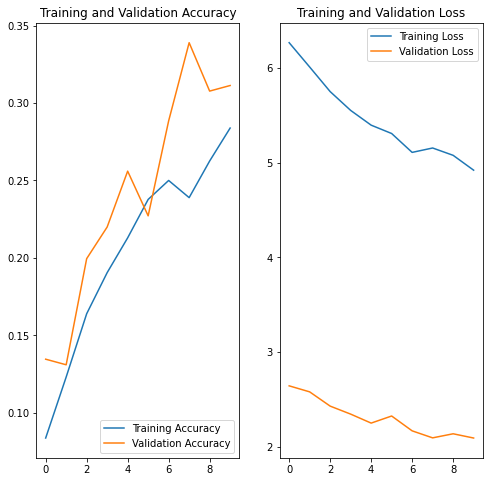

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save(r'../model/cnn_1_ak')

INFO:tensorflow:Assets written to: ../model/cnn_1_ak\assets


# Checking succession rate

#### Loading test csv

In [19]:
import pandas as pd
test_df = pd.read_csv("../plantbase/data/test_data.csv").drop(columns = "Unnamed: 0")

In [20]:
test_df = test_df[['id', 'genus']]
test_df.head()

,id,genus
0,100035,Verbascum
1,100058,Trifolium
2,100186,Veronica
3,100238,Campanula
4,1003,Geranium


In [21]:
import numpy as np
columns = np.sort(test_df.genus.unique())
columns

array(['Ajuga', 'Allium', 'Campanula', 'Cirsium', 'Crataegus', 'Gentiana',
       'Geranium', 'Iris', 'Malva', 'Narcissus', 'Ophrys', 'Rosa',
       'Trifolium', 'Verbascum', 'Veronica', 'Viola'], dtype=object)

In [22]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1
    
rename_columns

{0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

#### Loading test images using tensorflow load_img and img_to_array

In [23]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [24]:
X_list = []
y_list = []

for index, row in test_df.iterrows():
    img = load_img(rf"../raw_data/test/{row.id}.jpg", target_size=(256, 256))
    img = tensorflow.keras.preprocessing.image.img_to_array(img)
    #img = tensorflow.expand_dims(img, 0)
    X_list.append(img)
    y_list.append((row.genus, row.id))

In [25]:
y_true_df = pd.DataFrame(y_list, columns = ['true_genus', 'id'])
y_true_df.head()

,true_genus,id
0,Verbascum,100035
1,Trifolium,100058
2,Veronica,100186
3,Campanula,100238
4,Geranium,1003


In [26]:
X_test = np.stack(X_list, axis=0)

In [28]:
y_pred = model.predict(X_test)

ValueError: in user code:

    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:1510 predict_function  *
        return step_function(self, iterator)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:1500 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2731 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3420 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:1493 run_step  **
        outputs = model.predict_step(data)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:1466 predict_step
        return self(x, training=False)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1014 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\functional.py:427 call
        inputs, training=training, mask=mask)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\functional.py:562 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1000 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 23104 but received input with shape (None, 65536)


In [ ]:
y_pred.shape

In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns = rename_columns)
y_pred_df.head()

In [ ]:
y_true = np.stack(y_list, axis = 0)

In [ ]:
y_pred_df['pred_genus'] = y_pred_df.idxmax(axis = 1)
y_pred_df['pred_genus']

In [ ]:
prediction_review = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [ ]:
prediction_vec_df = y_pred_df[['pred_genus']].copy()
prediction_vec_df['true_genus'] = y_true_df['true_genus'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [ ]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

In [ ]:
true_pos_neg = prediction_vec_df.groupby('true_genus').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [ ]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [ ]:
success_ratio